import

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

Read in the data

In [95]:
train = pd.read_csv('./datasets/train.csv')

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [97]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [98]:
train.isnull().sum().sort_values(ascending = False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

## Cleaning missing data, which columns can we drop??

# as the first five columns have too many missing values(around half or more than half of the total values), we would drop the first five

#
Pool QC           2042  
Misc Feature      1986  
Alley             1911  
Fence             1651  
Fireplace Qu      1000

For the remaining ones we need to quntify them to numbers to see relationship

In [99]:
train.groupby(by='Garage Finish')['SalePrice'].mean() #nan of 114

Garage Finish
Fin    239800.664047
RFn    204792.036269
Unf    140718.148410
Name: SalePrice, dtype: float64

In [100]:
train['Garage Finish Score'] = train['Garage Finish'].map({'Unf':1, 'RFn':2, 'Fin':3}) #quantify the column

In [101]:
train.groupby(by='Garage Cond')['SalePrice'].mean()#nan of 114   looks like related to price, cannot drop

Garage Cond
Ex    124000.000000
Fa    107387.957447
Gd    209030.833333
Po     89925.000000
TA    188211.900964
Name: SalePrice, dtype: float64

In [102]:
train['Garage Cond Score'] = train['Garage Cond'].map({'Gd':5, 'TA':4, 'Ex':3,'Fa':2,'Po':1}) #quantify the column

In [103]:
train.groupby(by='Garage Qual')['SalePrice'].mean()#nan of 114

Garage Qual
Ex    241000.000000
Fa    116184.890244
Gd    262989.277778
Po     65000.000000
TA    188312.700328
Name: SalePrice, dtype: float64

In [104]:
train['Garage Qual Score'] = train['Garage Qual'].map({'Gd':5, 'TA':4, 'Ex':3,'Fa':2,'Po':1})

In [105]:
train.groupby(by='Garage Type')['SalePrice'].mean()#nan of 113

Garage Type
2Types     157184.210526
Attchd     205040.195383
Basment    143242.333333
BuiltIn    247883.522727
CarPort    103823.545455
Detchd     132132.947761
Name: SalePrice, dtype: float64

In [106]:
train['Garage Type Score'] = train['Garage Type'].map({'BuiltIn':2.5,'Attchd':2, '2Types':1.57, 'Basment':1.4,'Detchd':1.3,'CarPort':1})

In [107]:
high_miss = train[['Lot Frontage','Garage Finish Score','Garage Cond Score','Garage Qual Score','Garage Yr Blt','Garage Type Score','SalePrice']]

Text(0.5, 1, 'Which Ones Are Worth Dropping')

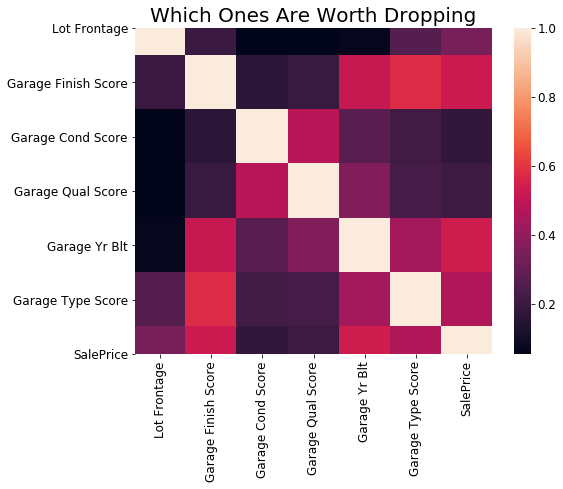

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(high_miss.corr())
plt.title('Which Ones Are Worth Dropping',size = 20)

## From the heatmap above, we can tell Garage Cond and Garage Qual and lot front have very low relationship with price, I will drop these three column as we as the other five

In [109]:
train.drop(columns = ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage','Garage Cond','Garage Qual'],inplace = True)

In [110]:
train.isnull().sum().sort_values(ascending = False).head(30)

Garage Finish          114
Garage Cond Score      114
Garage Finish Score    114
Garage Qual Score      114
Garage Yr Blt          114
Garage Type Score      113
Garage Type            113
Bsmt Exposure           58
BsmtFin Type 2          56
Bsmt Cond               55
BsmtFin Type 1          55
Bsmt Qual               55
Mas Vnr Type            22
Mas Vnr Area            22
Bsmt Full Bath           2
Bsmt Half Bath           2
BsmtFin SF 1             1
Total Bsmt SF            1
Bsmt Unf SF              1
BsmtFin SF 2             1
Garage Cars              1
Garage Area              1
Lot Area                 0
Exterior 1st             0
MS Zoning                0
Street                   0
Exter Cond               0
Exter Qual               0
MS SubClass              0
PID                      0
dtype: int64

For the remaining columns I think they are too vital to drop, consider the highest missing value is 114 out of 2051 which is around 5% I would drop these empty cells

In [111]:
train.dropna(inplace = True)

## Quantify catogoritical columns I choose, the way I choose is to see the mean difference we group them by Sale Price.

In [112]:
train.groupby(by = 'Neighborhood')['SalePrice'].mean().sort_values(ascending = False)

Neighborhood
GrnHill    330000.000000
StoneBr    329675.736842
NridgHt    321783.966387
NoRidge    316294.125000
Veenker    253570.588235
Timber     240492.872340
Somerst    226654.567797
ClearCr    221492.000000
Crawfor    205976.600000
CollgCr    203252.267045
Blmngtn    200417.681818
SawyerW    196133.243243
NWAmes     194619.022989
Gilbert    188947.618182
Greens     188666.666667
Mitchel    171711.333333
NAmes      148226.298969
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     139190.307692
Landmrk    137000.000000
Edwards    136898.196078
BrkSide    134067.045455
SWISU      132754.962963
OldTown    129702.407143
IDOTRR     110797.191489
MeadowV    106391.176471
BrDale     104030.555556
Name: SalePrice, dtype: float64

In [113]:
train['Neighborhood Score'] = train['Neighborhood'].map({'GrnHill':28, 'StoneBr':27, 'NridgHt':26,'NoRidge':25,'Veenker':24,
'Timber':23,'Somerst':22,'ClearCr':21,'Crawfor':20,'CollgCr':19,'Blmngtn':18,'SawyerW':17,'NWAmes':16,'Gilbert':15,'Greens':14,
  'Mitchel':13,'NAmes':12,'Blueste':11,'NPkVill':10,'Sawyer':9,'Landmrk':8,'Edwards':7,'BrkSide':6,'SWISU':5,'OldTown':4,
    'IDOTRR':3,'MeadowV':2,'BrDale':1})

## A rough Idea for the correlation

In [114]:
train.corr()['SalePrice'].sort_values()

PID                   -0.228868
Overall Cond          -0.142043
Enclosed Porch        -0.128727
MS SubClass           -0.071297
Kitchen AbvGr         -0.070353
Bsmt Half Bath        -0.055981
Id                    -0.051388
Low Qual Fin SF       -0.026528
Yr Sold               -0.010556
Misc Val              -0.007502
BsmtFin SF 2          -0.002936
Pool Area              0.026689
Mo Sold                0.029933
3Ssn Porch             0.047046
Screen Porch           0.128468
Bedroom AbvGr          0.139232
Garage Cond Score      0.168555
Bsmt Unf SF            0.172639
Garage Qual Score      0.200820
2nd Flr SF             0.244755
Half Bath              0.265362
Bsmt Full Bath         0.268327
Lot Area               0.296881
Wood Deck SF           0.312333
Open Porch SF          0.333555
BsmtFin SF 1           0.400909
Fireplaces             0.444647
Garage Type Score      0.463311
Mas Vnr Area           0.504453
Garage Finish Score    0.521435
TotRms AbvGrd          0.536018
Garage Y

In [115]:
interesting_cols = train[['Overall Qual','Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','SalePrice','Year Remod/Add']]

In [116]:
train.groupby(by = 'Heating QC')['SalePrice'].mean().sort_values(ascending = False)

Heating QC
Ex    219200.557443
Gd    165116.640411
TA    142842.579350
Fa    133621.541667
Po     97000.000000
Name: SalePrice, dtype: float64

In [117]:
train['Heating QC Score'] = train['Heating QC'].map({'Gd':1.65, 'TA':1.43, 'Ex':2.2,'Fa':1.33,'Po':0.97})

In [118]:
train.groupby(by = 'MS Zoning')['SalePrice'].mean().sort_values(ascending = False)

MS Zoning
FV         218634.172043
RL         195851.575778
RH         144912.181818
RM         134297.293040
C (all)     80865.272727
Name: SalePrice, dtype: float64

In [119]:
train['Sale Type Score'] = train['Sale Type'].replace({'New':9,'Con':8,'ConLI':7,'CWD':6,'WD ':5,'ConLD':4, 'COD':3,'ConLw':2,'Oth':1})

In [120]:
train['MS Zoning Score'] = train['MS Zoning'].map({'FV':5, 'RL':4, 'RH':3,'RM':2,'C (all)':1})

In [121]:
train['Bsmt Qual Score'] = train['Bsmt Qual'].map({'Gd':5, 'TA':4, 'Ex':3,'Fa':2,'Po':1})

In [122]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,SalePrice,Garage Finish Score,Garage Cond Score,Garage Qual Score,Garage Type Score,Neighborhood Score,Heating QC Score,Sale Type Score,MS Zoning Score,Bsmt Qual Score
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,130500,2.0,4.0,4.0,2.0,9,2.20,5,4,4
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,220000,2.0,4.0,4.0,2.0,17,2.20,5,4,5
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,109000,1.0,4.0,4.0,1.3,12,1.43,5,4,4
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,174000,3.0,4.0,4.0,2.5,23,1.65,5,4,5
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,138500,1.0,4.0,4.0,1.3,17,1.43,5,4,2


Text(0.5, 1, 'Correlation between Factors')

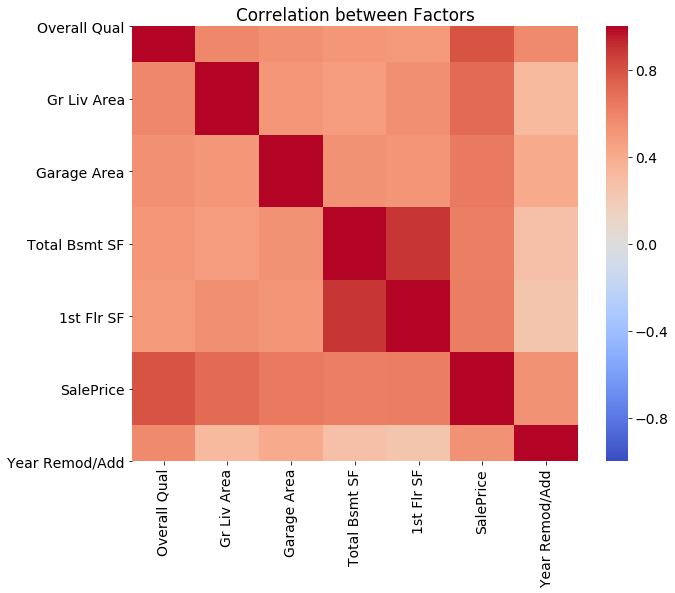

In [123]:
plt.figure(figsize=(10, 8))
plt.rc('font', size=14)
sns.heatmap(interesting_cols.corr(),vmin = -1, vmax = 1,cmap = 'coolwarm' )
plt.title('Correlation between Factors')


Text(0.5, 1, 'Sales Price Factors')

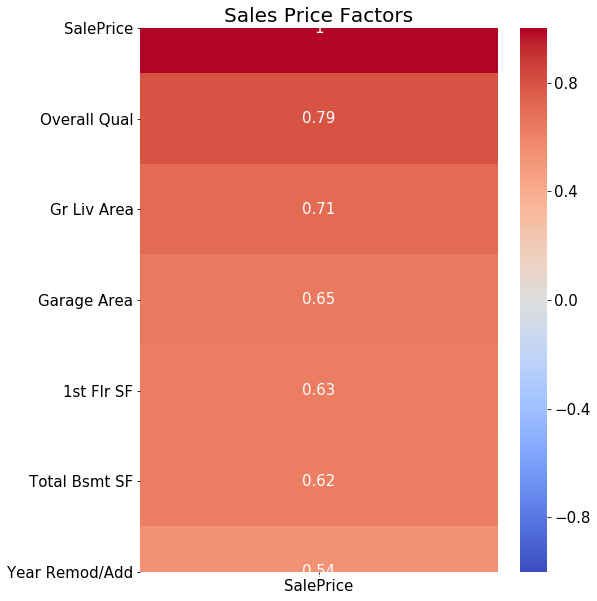

In [124]:
plt.figure(figsize=(8, 10))
plt.rc('font', size=15) 
sns.heatmap(interesting_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True,
            cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sales Price Factors', Size = 20)


## Polynomial for all numeric data

In [125]:
numeric_data = train._get_numeric_data().columns

In [126]:
X = train._get_numeric_data().drop(columns=['SalePrice','Id','PID'])
features = list(X.columns)
y = train['SalePrice']

In [127]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

In [128]:
X_poly_train,X_poly_holdout,y_train,y_holdout = train_test_split(X_poly,y, random_state = 66)

In [129]:
ss=StandardScaler()
ss.fit(X_poly_train)
X_train_sc=ss.transform(X_poly_train)
X_holdout_sc = ss.transform(X_poly_holdout)

In [130]:
lm = LinearRegression()
lm.fit(X_train_sc, y_train)
lm.score(X_train_sc, y_train)

0.9845951181209636

In [131]:
lm.score(X_holdout_sc,y_holdout)

-5.225621100632241e+18

In [132]:
l_alpha = np.logspace(2, 4, 100)
lasso = LassoCV(alphas=l_alpha, cv=5, max_iter=1000)
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=array([  100.        ,   104.76157528,   109.74987655,   114.97569954,
         120.45035403,   126.18568831,   132.19411485,   138.48863714,
         145.08287785,   151.9911083 ,   159.22827933,   166.81005372,
         174.75284   ,   183.07382803,   191.79102617,   200.92330026,
         210.49041445,   220.51307399,   231.01297001,   242.01282648,
         253.5364494 ,   265.60877829,   278.25594022,   291.50530628,
         305.38555088,   319.92671378,   335...
        5994.84250319,  6280.29144183,  6579.33224658,  6892.61210435,
        7220.80901839,  7564.63327555,  7924.82898354,  8302.17568132,
        8697.49002618,  9111.62756115,  9545.48456662, 10000.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [133]:
lasso.alpha_

509.413801481638

In [134]:
lasso.score(X_holdout_sc, y_holdout)

0.3340342664005759

In [143]:
coef_df = pd.DataFrame({"Predictor Variables":poly.get_feature_names(features),"Coef_weight":np.round(lasso.coef_,2),'absolute':np.round(abs(lasso.coef_,),2)})

## List Below shows the interaction data Lasso think is important

In [144]:
coef_df.sort_values(by='absolute',ascending = False).head(20)

,Predictor Variables,Coef_weight,absolute
143,Overall Qual Gr Liv Area,18267.51,18267.51
468,Total Bsmt SF Neighborhood Score,14519.41,14519.41
139,Overall Qual Total Bsmt SF,12731.17,12731.17
596,Gr Liv Area Sale Type Score,6738.40,6738.40
331,BsmtFin SF 1^2,6562.00,6562.00
184,Overall Cond Gr Liv Area,6308.71,6308.71
472,Total Bsmt SF Bsmt Qual Score,-6114.02,6114.02
215,Year Built Year Remod/Add,5503.59,5503.59
330,Mas Vnr Area Bsmt Qual Score,-4308.70,4308.70
154,Overall Qual Garage Area,3844.34,3844.34


## Create Interactions to put them in a working model

In [44]:
train['Overall Qual Gr Liv Area']= train['Overall Qual']*train['Gr Liv Area']

In [45]:
train['Overall Qual Total Bsmt SF']=train['Overall Qual']*train['Total Bsmt SF']

In [46]:
train['Total Bsmt SF Neighborhood Score']=train['Total Bsmt SF']*train['Neighborhood Score']

In [47]:
train['Gr Liv Area Sale Type Score']=train['Gr Liv Area']*train['Sale Type Score']

In [48]:
train['BsmtFin SF 1^2']=train['BsmtFin SF 1']**2

In [49]:
train['Overall Cond Gr Liv Area']=train['Overall Cond']*train['Gr Liv Area']

In [50]:
train['Total Bsmt SF Bsmt Qual Score']=train['Total Bsmt SF']*train['Bsmt Qual Score']

In [51]:
features = ['Total Bsmt SF Bsmt Qual Score','Overall Cond Gr Liv Area','BsmtFin SF 1^2','Gr Liv Area Sale Type Score','Total Bsmt SF Neighborhood Score','Overall Qual Total Bsmt SF','Overall Qual Gr Liv Area','Gr Liv Area','Overall Qual','Total Bsmt SF','Neighborhood Score','BsmtFin SF 1','Bsmt Qual Score','Year Built','Overall Cond','Bedroom AbvGr','Sale Type Score','Kitchen AbvGr','Lot Area','Garage Area']
X = train[features]
y = train['SalePrice']

In [52]:
X_train,X_holdout,y_train,y_holdout = train_test_split(X,y, random_state = 33)

In [53]:
ss=StandardScaler()
ss.fit(X_train)
X_train_sc=ss.transform(X_train)
X_holdout_sc = ss.transform(X_holdout)

In [54]:
slr = LinearRegression()

## Cross_val_score to see sample

In [55]:
cross_val_score(slr,X_train_sc,y_train,cv = 5).mean()

0.8949617129415482

In [56]:
slr.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
slr.coef_

array([-26050.58363247,  15736.80964735, -26748.41163729,   8248.71824986,
        60910.38065164, -15891.01993499,  46138.88797843, -19783.35751072,
         4562.3085829 ,  14436.26668407, -23261.05601835,  22863.45269445,
         6639.91893669,  10624.58180567,   -305.86730491,  -1110.06896262,
         1750.46785277,  -2339.68323538,   6215.17013771,   4582.82426786])

## R2 score for train data

In [58]:
slr.score(X_train_sc,y_train)

0.9056273136623044

## R2 score for holdout data

In [59]:
slr.score(X_holdout_sc,y_holdout)

0.8976716478899749

In [60]:
y_pred = slr.predict(X_holdout_sc)

In [61]:
residuals = y_holdout - y_pred

## Residual Mean

In [62]:
residuals.mean()

35.4075944046585

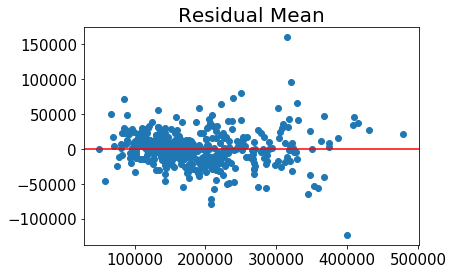

In [63]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r')
plt.title('Residual Mean',size = 20)
plt.savefig('./plots/residual.png')

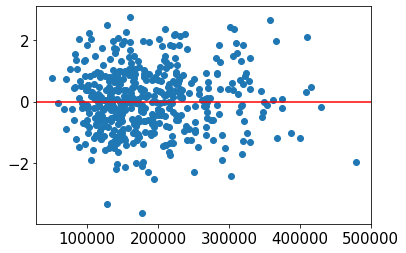

In [64]:
plt.scatter(y_pred, np.random.randn(len(y_pred)))
plt.axhline(0, color='r')

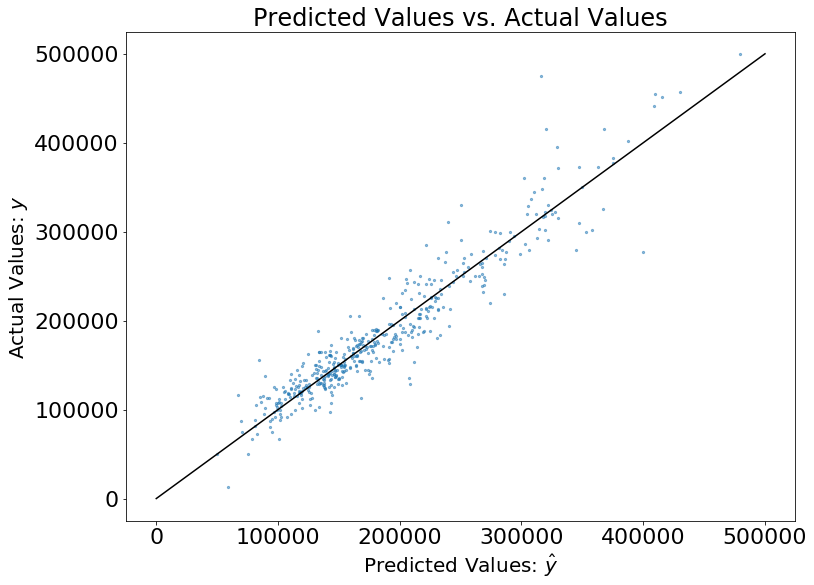

In [65]:
plt.figure(figsize=(12,9))
plt.rc('font', size=22)
# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y_holdout, s=5, alpha = 0.5)

# Plot a line.
plt.plot([10, np.max(y_holdout)],
         [10, np.max(y_holdout)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);
plt.savefig('./plots/pred_actua.png')

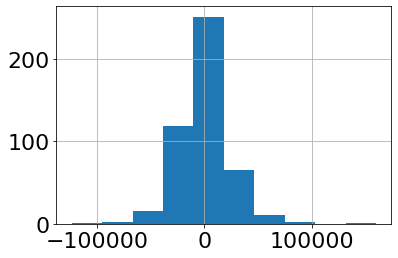

In [66]:
residuals.hist()

## MAE

In [67]:
metrics.mean_absolute_error(y_holdout,y_pred) #MAE

16781.345252323907

## MSE

In [68]:
metrics.mean_squared_error(y_holdout,y_pred) #MSE

579735002.1582978

In [69]:
heatmap_col = train[['SalePrice','Total Bsmt SF Bsmt Qual Score','Overall Cond Gr Liv Area','BsmtFin SF 1^2','Gr Liv Area Sale Type Score','Total Bsmt SF Neighborhood Score','Overall Qual Total Bsmt SF','Overall Qual Gr Liv Area','Gr Liv Area','Overall Qual','Total Bsmt SF','Neighborhood Score','BsmtFin SF 1','Bsmt Qual Score','Year Built','Overall Cond','Bedroom AbvGr','Sale Type Score','Kitchen AbvGr','Lot Area','Garage Area']]

Text(0.5, 1, 'Updated Sales Price Factor')

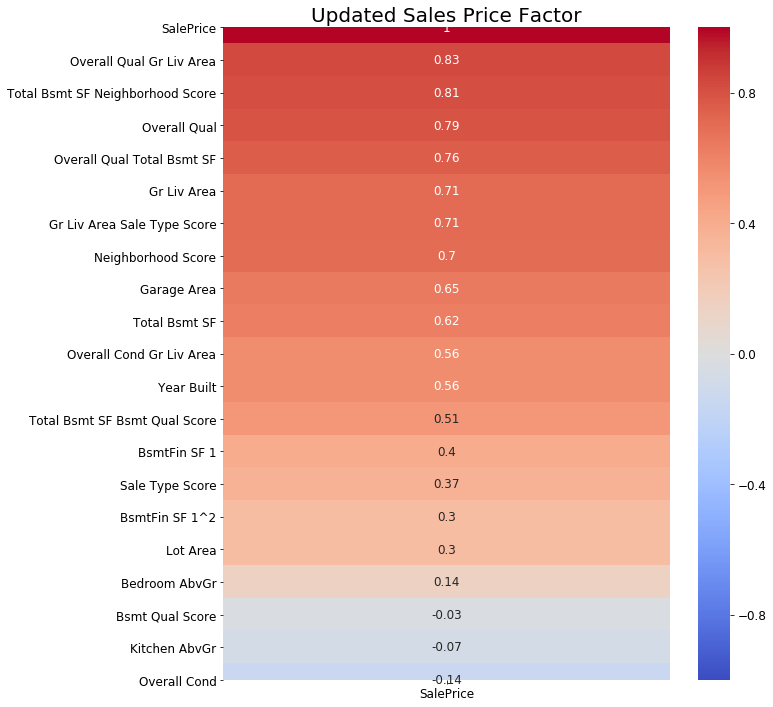

In [70]:
plt.figure(figsize=(10, 12))
plt.rc('font', size=12)
sns.heatmap(heatmap_col.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True,
            cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Updated Sales Price Factor', size = 20)


Kaggle Submission

In [71]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [72]:
test['Neighborhood Score'] = test['Neighborhood'].map({'GrnHill':28, 'StoneBr':27, 'NridgHt':26,'NoRidge':25,'Veenker':24,
'Timber':23,'Somerst':22,'ClearCr':21,'Crawfor':20,'CollgCr':19,'Blmngtn':18,'SawyerW':17,'NWAmes':16,'Gilbert':15,'Greens':14,
  'Mitchel':13,'NAmes':12,'Blueste':11,'NPkVill':10,'Sawyer':9,'Landmrk':8,'Edwards':7,'BrkSide':6,'SWISU':5,'OldTown':4,
    'IDOTRR':3,'MeadowV':2,'BrDale':1})

In [73]:
test['Sale Type Score'] = test['Sale Type'].replace({'New':9,'Con':8,'ConLI':7,'CWD':6,'WD ':5,'ConLD':4, 'COD':3,'ConLw':2,'Oth':1,'VWD':0})

In [74]:
test['Sale Type Score'].value_counts()

5    755
9     79
3     24
4      9
2      3
1      3
7      2
6      2
8      1
0      1
Name: Sale Type Score, dtype: int64

In [75]:
test['Bsmt Qual Score'] = test['Bsmt Qual'].map({'Gd':5, 'TA':4, 'Ex':3,'Fa':2,'Po':1})

In [76]:
test = test.fillna(0)

In [77]:
test['Bsmt Qual Score'].unique()

array([2., 5., 4., 3., 0., 1.])

In [78]:
test.isnull().sum().sort_values(ascending = False).head(40)

Bsmt Qual Score    0
Year Built         0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Year Remod/Add     0
Overall Cond       0
Heating            0
Overall Qual       0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
dtype: int64

In [79]:
test['Overall Qual Gr Liv Area']= test['Overall Qual']*test['Gr Liv Area']

In [80]:
test['Overall Qual Total Bsmt SF']=test['Overall Qual']*test['Total Bsmt SF']

In [81]:
test['Total Bsmt SF Neighborhood Score']=test['Total Bsmt SF']*test['Neighborhood Score']

In [82]:
test['Gr Liv Area Sale Type Score']=test['Gr Liv Area']*test['Sale Type Score']

In [83]:
test['BsmtFin SF 1^2']=test['BsmtFin SF 1']**2

In [84]:
test['Overall Cond Gr Liv Area']=test['Overall Cond']*test['Gr Liv Area']

In [85]:
test['Total Bsmt SF Bsmt Qual Score']=test['Total Bsmt SF']*test['Bsmt Qual Score']

In [86]:
X_test = test[features]
X_test_sc = ss.transform(X_test)
test['SalePrice'] = slr.predict(X_test_sc)

In [87]:
test[['Id', 'SalePrice']].head()

,Id,SalePrice
0,2658,158906.226048
1,2718,111023.352136
2,2414,216998.599506
3,1989,90710.646467
4,625,157528.578124


In [88]:
test[['Id', 'SalePrice']].to_csv('./datasets/preds_final.csv', index=False)